In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import preprocess_input
datagen_test = ImageDataGenerator(preprocessing_function=preprocess_input)
batch_size = 64


generator_test = datagen_test.flow_from_directory(directory='test',
                                                  target_size=(128, 128),
                                                  batch_size=batch_size,
                                                  shuffle=False)

Found 5459 images belonging to 38 classes.


In [ ]:
#Get the accuracy score
from tensorflow.keras.models import load_model
import numpy as np
model_name = 'ResNet152V2.h5'
model = load_model(model_name)
Y_pred = model.predict(generator_test)
y_true = generator_test.classes
y_pred = np.argmax(Y_pred, axis=1)
# print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
# print("[INFO] Loss: {:.2f}%".format(test_score[0] * 100))

2022-07-03 06:15:46.964477: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:952] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-03 06:15:46.996413: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:952] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-03 06:15:46.996594: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:952] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-03 06:15:46.997064: I tensorflow/core/platform/cpu_feature_guard.cc:152] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns

class_names = [*range(len(generator_test.class_indices))]


def plot_confusion_matrix(y_true, y_pred, fig_name=''):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(len(class_names), len(class_names)))
    sns.set(font_scale=1.7)
    ax = sns.heatmap(cm, annot=True, fmt='g', cmap='mako_r', cbar=False)

    # prop = FontProperties(fname='kalpurush.ttf', size=20)
    # ax.set_xticklabels(class_names, fontproperties=prop)
    ax.tick_params(axis='x', rotation=90)

    # ax.set_yticklabels(class_names, fontproperties=prop)
    ax.tick_params(axis='y', rotation=0)

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    if fig_name:
        plt.savefig(f'cmat_{fig_name}', dpi=100, bbox_inches='tight')

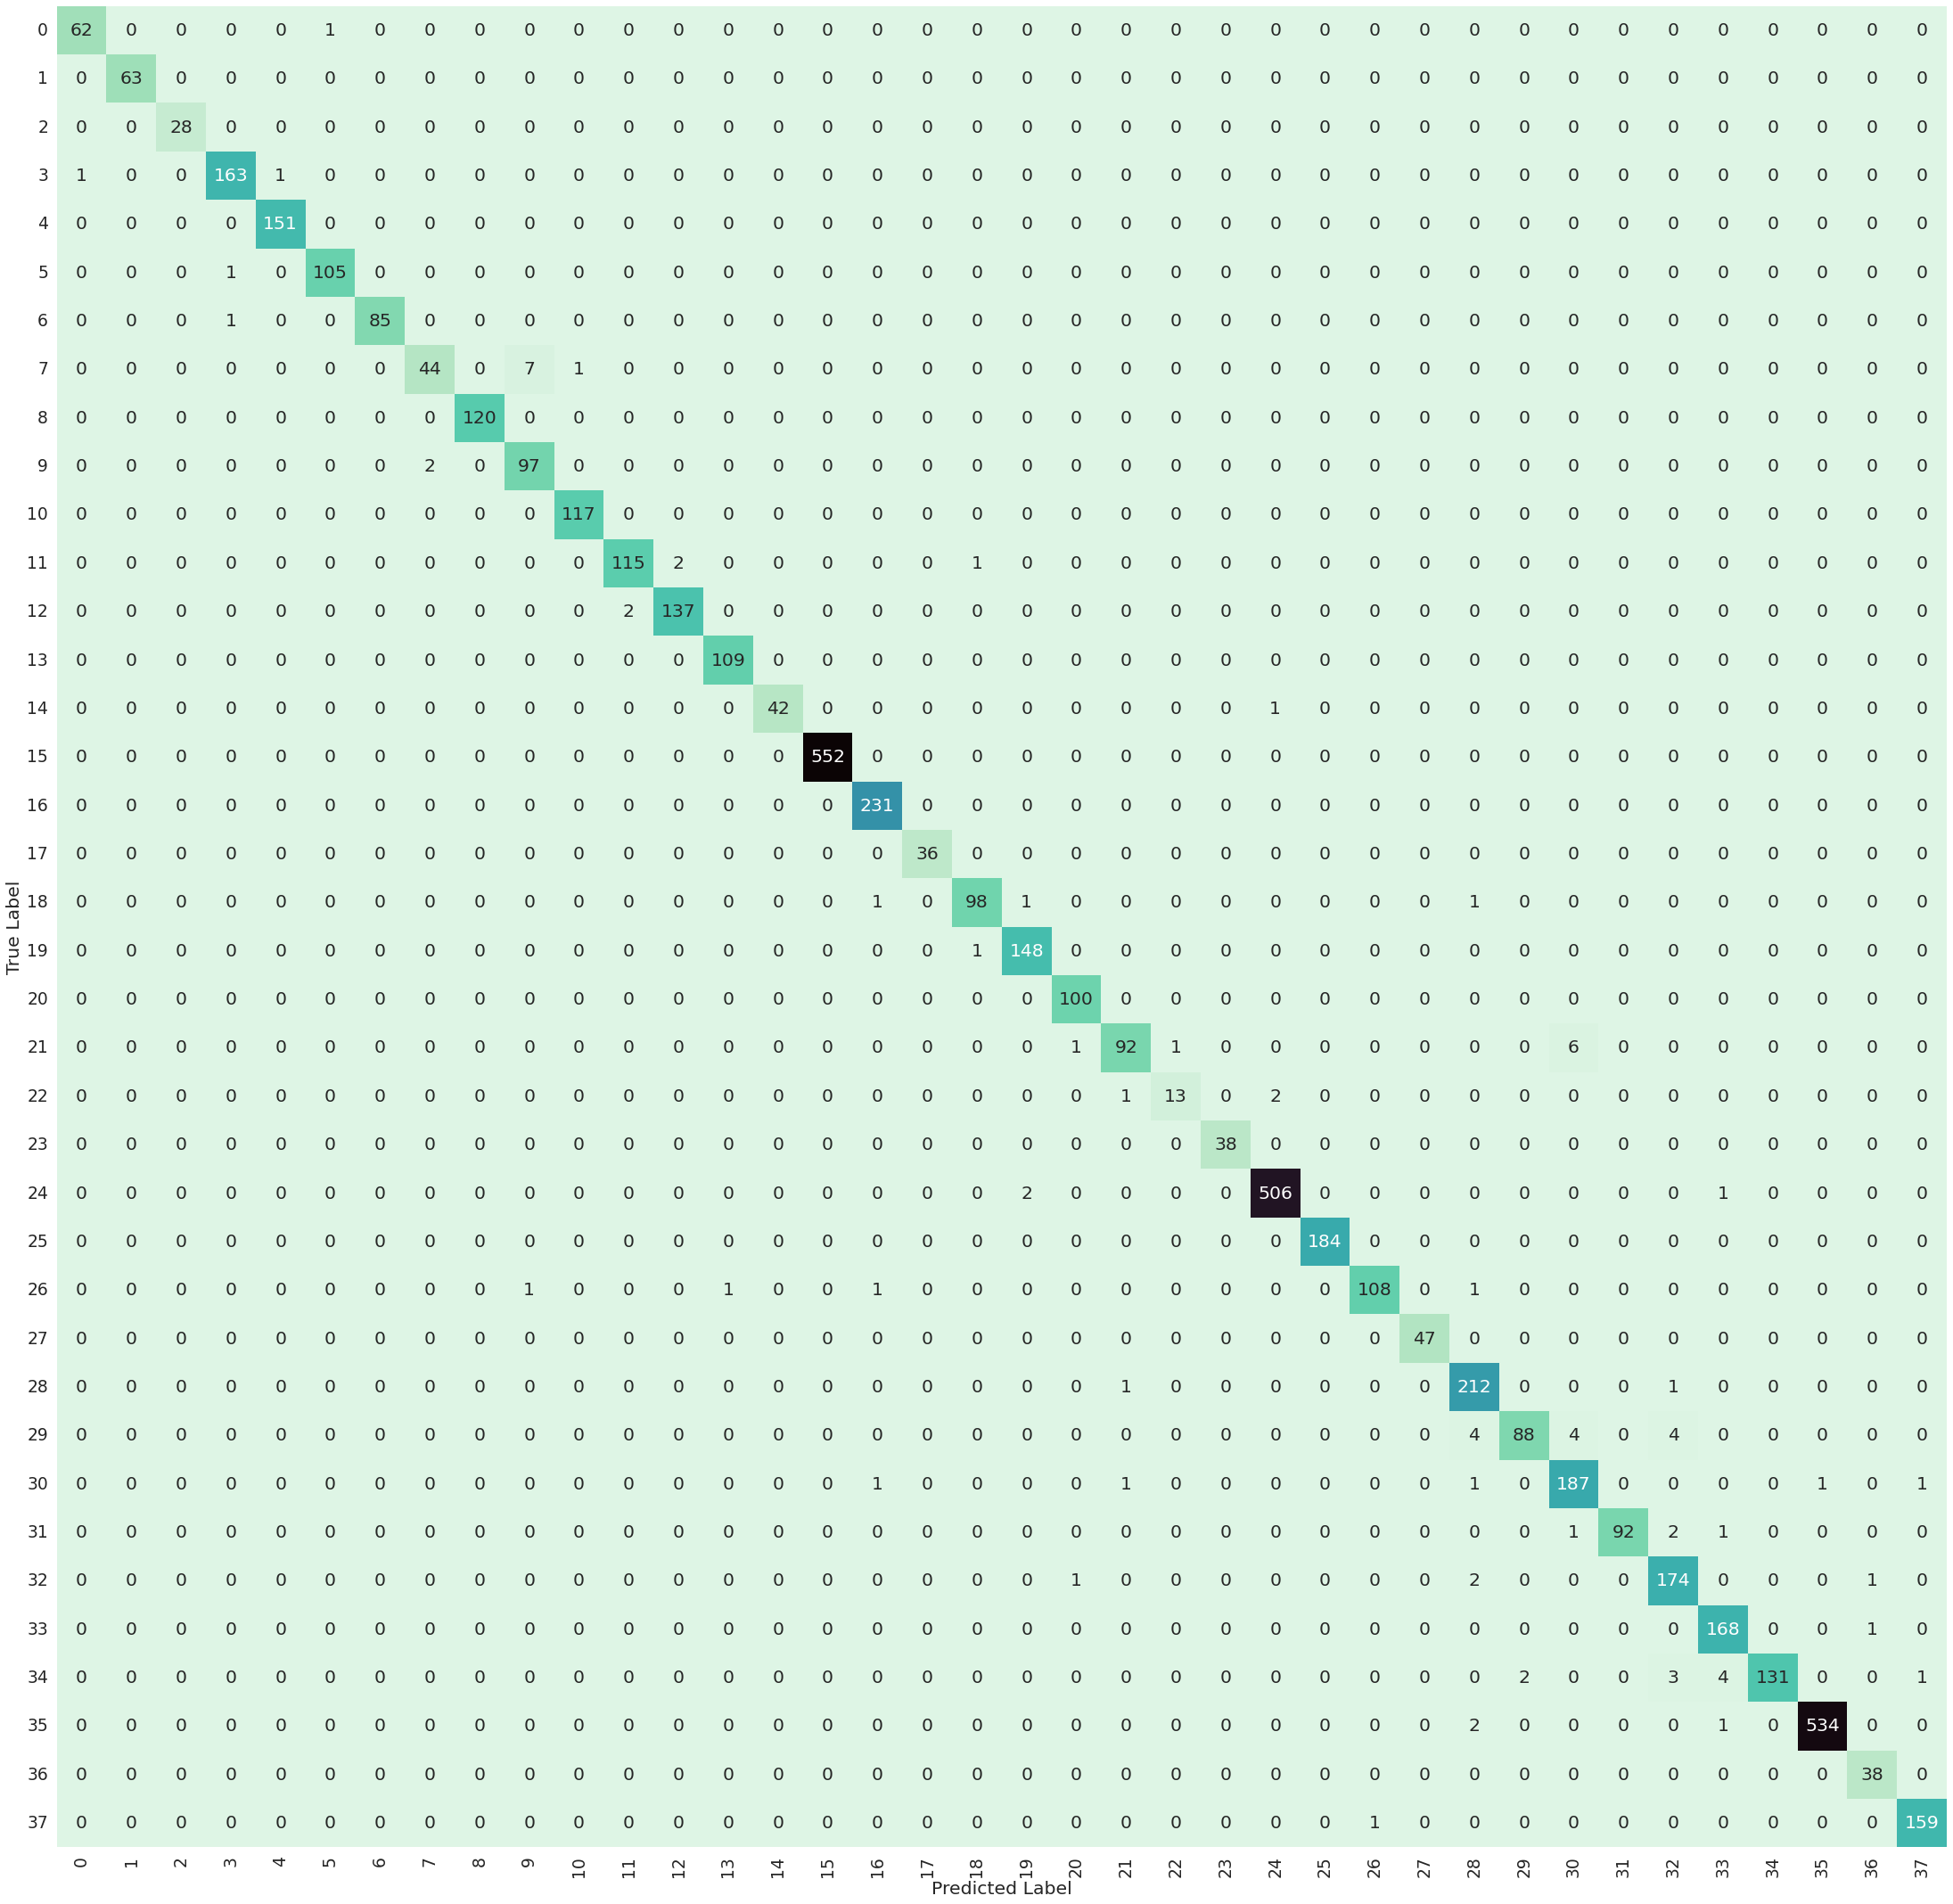

In [ ]:
plot_confusion_matrix(y_true, y_pred, f'{model_name.split("/")[-1][:-3]}')

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_true,y_pred, digits=4))
# accuracy_score(generator_test.classes, y_pred)

              precision    recall  f1-score   support

           0     0.9841    0.9841    0.9841        63
           1     1.0000    1.0000    1.0000        63
           2     1.0000    1.0000    1.0000        28
           3     0.9879    0.9879    0.9879       165
           4     0.9934    1.0000    0.9967       151
           5     0.9906    0.9906    0.9906       106
           6     1.0000    0.9884    0.9942        86
           7     0.9565    0.8462    0.8980        52
           8     1.0000    1.0000    1.0000       120
           9     0.9238    0.9798    0.9510        99
          10     0.9915    1.0000    0.9957       117
          11     0.9829    0.9746    0.9787       118
          12     0.9856    0.9856    0.9856       139
          13     0.9909    1.0000    0.9954       109
          14     1.0000    0.9767    0.9882        43
          15     1.0000    1.0000    1.0000       552
          16     0.9872    1.0000    0.9935       231
          17     1.0000    